In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузите данные
data = pd.read_csv('data/winequality-red.csv', sep=';')



In [19]:
has_missing_data = data.empty
if has_missing_data:
    print("В данных имеются пропуски")
    # очевидно здесь нужно было бы удалить данные с пропусками, но в задание необходимо просто проверить
    # data = data.dropna()
else:
    print("Пропуски в данных не обнаружены")



Пропуски в данных не обнаружены


In [22]:
# Создаем бинарный класс 0 / 1
data['QualityBin'] = (data['quality'] >= 6).astype(int)

# Рассчитываем 25-й и 75-й процентили
Q1= data['quality'].quantile(0.25)
Q3 = data['quality'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы
outliers = data[(data['quality'] < lower_bound) | (data['quality'] > upper_bound)]
print("Количество удаленных выбросов: ", len(outliers))

data_cleaned = data[(data['quality'] >= lower_bound) & (data['quality'] <= upper_bound)]


Количество удаленных выбросов:  28


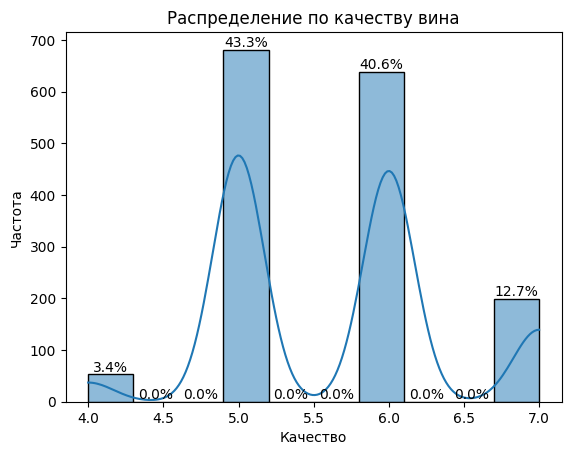

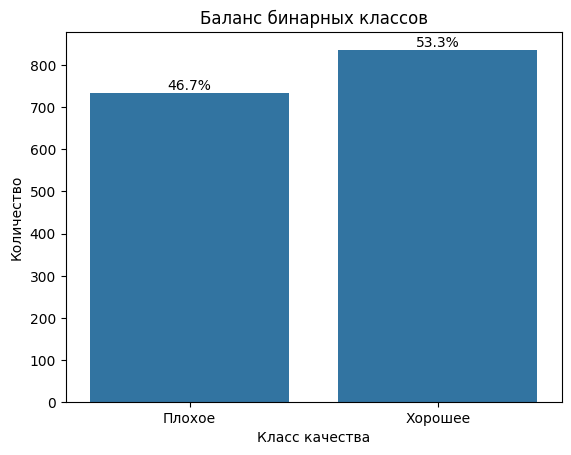

Медиана по каждому признаку:
 fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.10000
quality                  6.00000
QualityBin               1.00000
dtype: float64


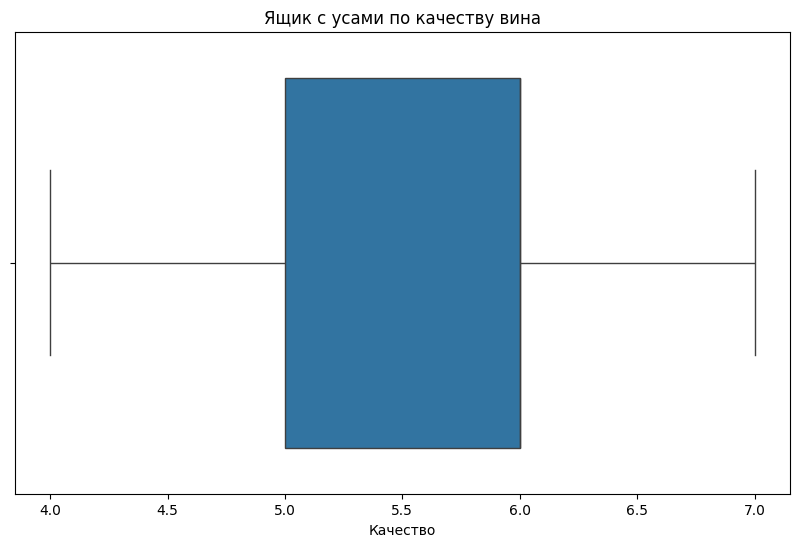

In [23]:
# Построение графика распределения (distplot)
ax = sns.histplot(data_cleaned['quality'], bins=10, kde=True)
plt.title('Распределение по качеству вина')
plt.xlabel('Качество')
plt.ylabel('Частота')
total = data_cleaned['quality'].count()
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.show()

# Построение графика баланса качества
ax = sns.countplot(x='QualityBin', data=data_cleaned, )
plt.title('Баланс бинарных классов')
plt.xlabel('Класс качества')
plt.ylabel('Количество')
plt.xticks(ticks=[0, 1], labels=['Плохое', 'Хорошее'])
total = data_cleaned['quality'].count()
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.show()

# Рассчитываем медиану
median_values = data_cleaned.median()
print("Медиана по каждому признаку:\n", median_values)

# Построение ящика с усами
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['quality'])
plt.title('Ящик с усами по качеству вина')
plt.xlabel('Качество')
plt.show()

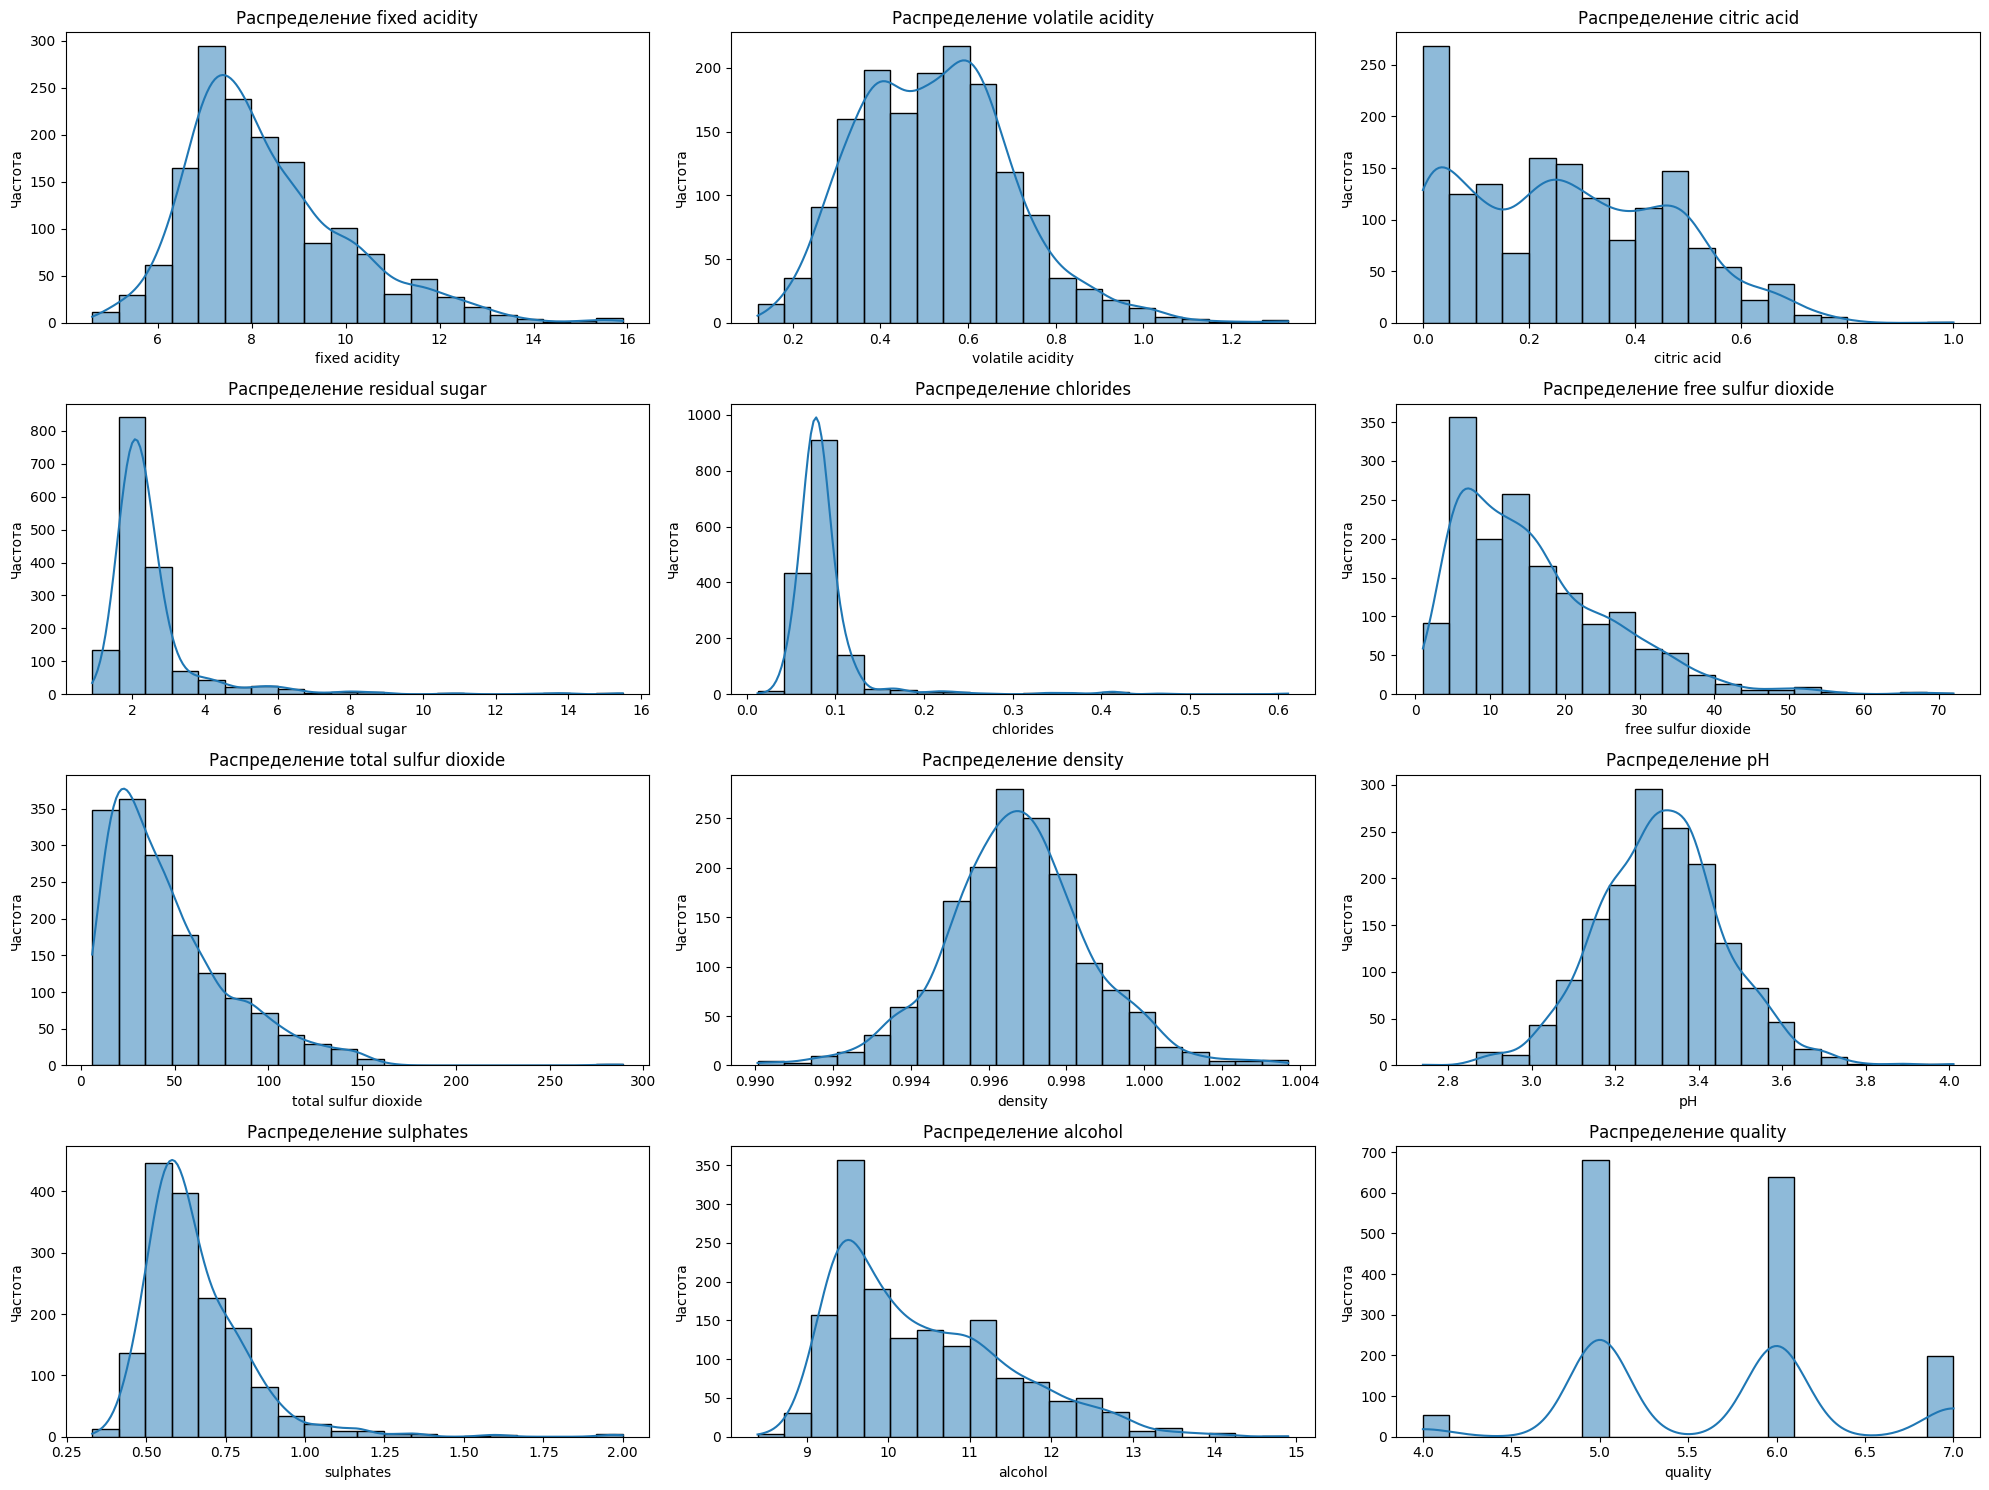

In [24]:
# Создание графиков распределений
plt.figure(figsize=(20, 15))

features = data_cleaned.columns[:-1]

for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)  # Подгоняем количество строк и столбцов
    sns.histplot(data_cleaned[feature], bins=20, kde=True)
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

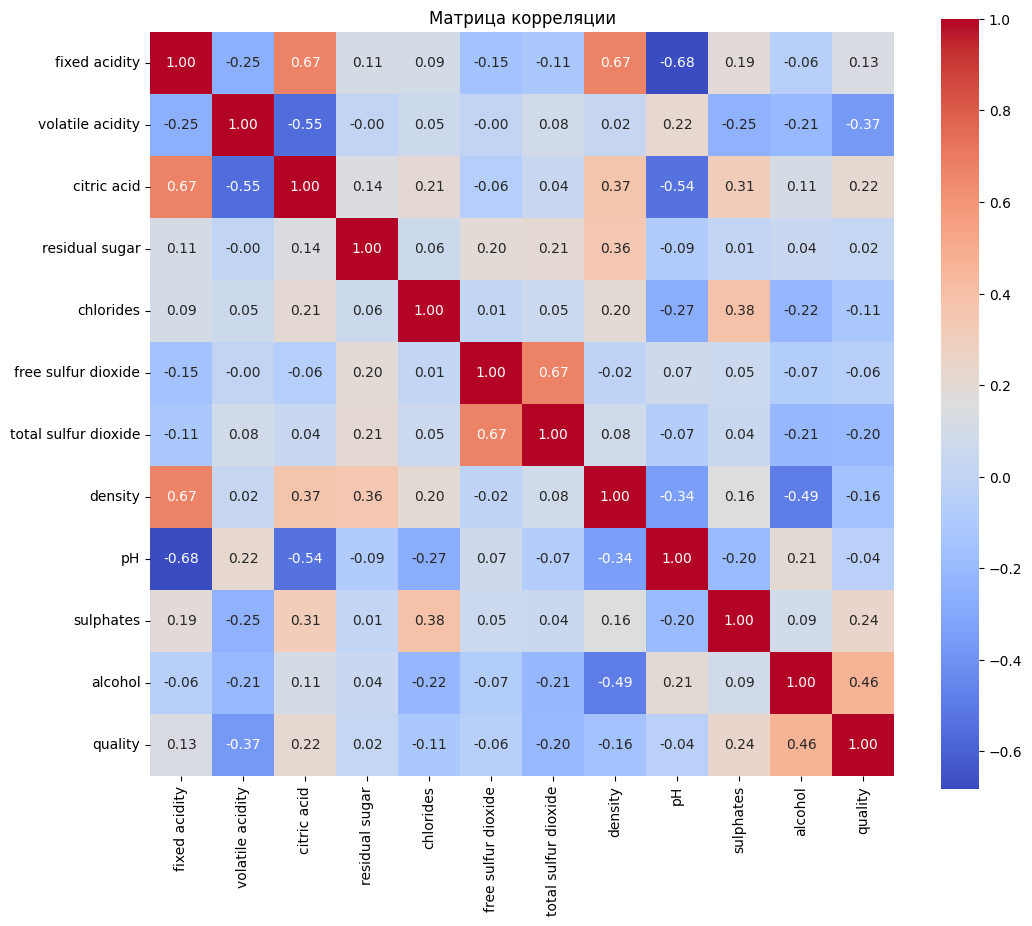

In [29]:
# Рассчитываем корреляцию
correlation_matrix = data_cleaned.drop(["QualityBin"], axis=1).corr()

# Построение тепловой карты для матрицы корреляции
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Матрица корреляции')
plt.show()